In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df1=pd.read_csv('O3.csv')

In [3]:
df1

,system:time_start,O3_column_number_density
0,"Sep 8, 2018",NaN
1,"Sep 8, 2018",NaN
2,"Sep 26, 2018",NaN
3,"Sep 26, 2018",NaN
4,"Sep 26, 2018",NaN
...,...,...
27774,"Feb 23, 2024",NaN
27775,"Feb 23, 2024",NaN
27776,"Feb 23, 2024",NaN
27777,"Feb 23, 2024",NaN


In [4]:
df1.shape

(27779, 2)

In [5]:
df1.describe()

,O3_column_number_density
count,2571.000000
mean,0.137448
std,0.012027
min,0.109000
25%,0.129000
50%,0.135000
75%,0.144000
max,0.192000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27779 entries, 0 to 27778
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system:time_start         27779 non-null  object 
 1   O3_column_number_density  2571 non-null   float64
dtypes: float64(1), object(1)
memory usage: 434.2+ KB


In [7]:
df1['O3_column_number_density'] = df1['O3_column_number_density'].astype(float)

In [8]:
df1['system:time_start'] = pd.to_datetime(df1['system:time_start'])

In [9]:
df_non_null = df1.dropna(subset=['O3_column_number_density'])

In [10]:
len(df_non_null)

2571

In [11]:
df_unique = df_non_null.drop_duplicates(subset=['system:time_start'])

len(df_unique)

1964

In [12]:
date_range = pd.date_range(start=df_unique['system:time_start'].min(), end=df_unique['system:time_start'].max())
dates_in_df = set(df_unique['system:time_start'])
missing_dates = [date for date in date_range if date not in dates_in_df]

In [13]:
# number of days missing
len(missing_dates)

13

In [14]:
def generate_box_plot(data, attribute_name, show_outliers=True):
    
    fig, ax = plt.subplots()
    if show_outliers:
        box = ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        box = ax.boxplot(data, vert=True, patch_artist=True, labels=[attribute_name], showfliers=False)
    
    outliers = box['fliers'][0].get_data()[0] if show_outliers else []
    num_outliers = len(outliers)
    print("Number of outliers:", num_outliers)
    
    plt.title(f"Boîte à Moustache de {attribute_name}")
    
    plt.grid(True)
    plt.show()

Number of outliers: 55


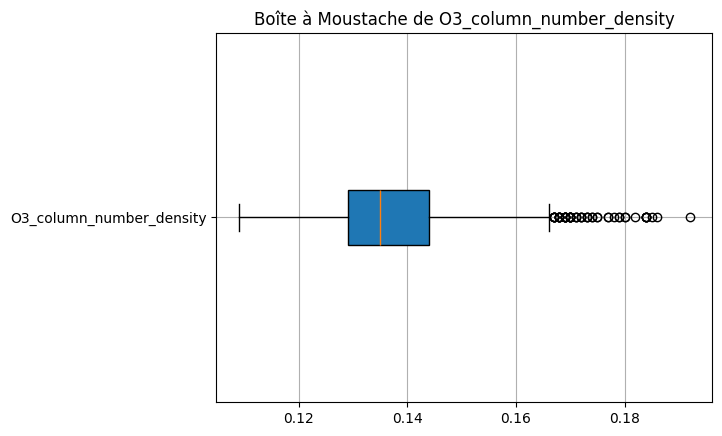

In [15]:
generate_box_plot(df_non_null['O3_column_number_density'], 'O3_column_number_density', show_outliers=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8652\1880160036.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


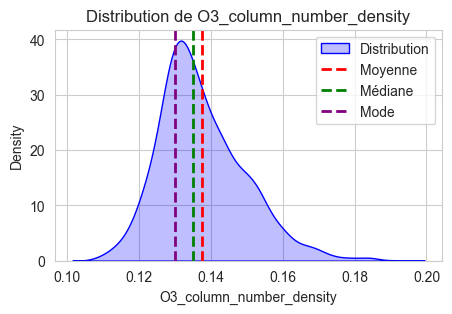

In [16]:
def visualiser_symetrie(df):
    col = ['O3_column_number_density']
    for i, c in enumerate(col):
        sns.set_style("whitegrid")
        plt.figure(figsize=(5, 3))
        sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")
        plt.axvline(np.mean(df[c]), color='red', linestyle='dashed', linewidth=2, label='Moyenne')
        plt.axvline(np.median(df[c]), color='green', linestyle='dashed', linewidth=2, label='Médiane')
        mode = round(df[c].mode().values[0],2)
        plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')
        plt.legend()
        plt.title('Distribution de '+c)
        plt.show()

visualiser_symetrie(df_non_null)

In [59]:
'''
2019-02-08', '2020-02-05
2023-02-08', '2024-02-05'''

"\n2019-02-08', '2020-02-05\n2023-02-08', '2024-02-05"

In [17]:
from datetime import datetime

start_date = datetime(2019, 2, 8)
end_date = datetime(2024, 2, 25)

num_days = (end_date - start_date).days + 1

print("Number of days between", start_date.date(), "and", end_date.date(), "is:", num_days)


Number of days between 2019-02-08 and 2024-02-25 is: 1844
